In [20]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Load the artificial dataset
data2024b = pd.read_csv('data2024b.csv')
data2024b_values = data2024b[['V1', 'V2']].values

# Fit the initial GMM with 4 components
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
gmm.fit(data2024b_values)

# Number of bootstrap samples
n_bootstrap = 1000

# Arrays to store bootstrap parameters
bootstrap_means = np.zeros((n_bootstrap, gmm.means_.shape[0], gmm.means_.shape[1]))
bootstrap_covariances = np.zeros((n_bootstrap, gmm.covariances_.shape[0], gmm.covariances_.shape[1], gmm.covariances_.shape[2]))
bootstrap_weights = np.zeros((n_bootstrap, gmm.weights_.shape[0]))

# Bootstrapping procedure
for i in range(n_bootstrap):
    # Resample the data (with replacement)
    resampled_data = resample(data2024b_values, random_state=i)
    
    # Refit the GMM on the resampled data
    gmm_resampled = GaussianMixture(n_components=4, covariance_type='full', random_state=i)
    gmm_resampled.fit(resampled_data)
    
    # Store the parameters
    bootstrap_means[i] = gmm_resampled.means_
    bootstrap_covariances[i] = gmm_resampled.covariances_
    bootstrap_weights[i] = gmm_resampled.weights_

# Compute 95% confidence intervals for means, covariances, and weights
means_lower = np.percentile(bootstrap_means, 2.5, axis=0)
means_upper = np.percentile(bootstrap_means, 97.5, axis=0)
covariances_lower = np.percentile(bootstrap_covariances, 2.5, axis=0)
covariances_upper = np.percentile(bootstrap_covariances, 97.5, axis=0)
weights_lower = np.percentile(bootstrap_weights, 2.5, axis=0)
weights_upper = np.percentile(bootstrap_weights, 97.5, axis=0)

# Print the confidence intervals for the means
print("95% Confidence Intervals for Means (per cluster):")
for i in range(4):  # Assuming 4 clusters
    print(f"Cluster {i+1} means (V1, V2): Lower = {means_lower[i]}, Upper = {means_upper[i]}")

# Print the confidence intervals for the covariances
print("\n95% Confidence Intervals for Covariances (per cluster):")
for i in range(4):  # Assuming 4 clusters
    print(f"Cluster {i+1} covariances (V1, V2):")
    print(f"Lower = \n{covariances_lower[i]}")
    print(f"Upper = \n{covariances_upper[i]}")

# Print the confidence intervals for the weights
print("\n95% Confidence Intervals for Weights (per cluster):")
for i in range(4):  # Assuming 4 clusters
    print(f"Cluster {i+1} weights: Lower = {weights_lower[i]:.4f}, Upper = {weights_upper[i]:.4f}")


95% Confidence Intervals for Means (per cluster):
Cluster 1 means (V1, V2): Lower = [-1.93957908 -1.55458355], Upper = [3.83318872 1.65068785]
Cluster 2 means (V1, V2): Lower = [-1.93694771 -1.5346013 ], Upper = [3.85284923 1.65900105]
Cluster 3 means (V1, V2): Lower = [-1.93583303 -1.5232457 ], Upper = [3.85419158 1.6469677 ]
Cluster 4 means (V1, V2): Lower = [-1.93431365 -1.56157926], Upper = [3.8541277 1.6513032]

95% Confidence Intervals for Covariances (per cluster):
Cluster 1 covariances (V1, V2):
Lower = 
[[ 0.78701245 -0.4276306 ]
 [-0.4276306   0.7273497 ]]
Upper = 
[[1.77701478 0.10103525]
 [0.10103525 1.09153389]]
Cluster 2 covariances (V1, V2):
Lower = 
[[ 0.78763871 -0.42588496]
 [-0.42588496  0.73610541]]
Upper = 
[[1.73494599 0.09336127]
 [0.09336127 1.06957904]]
Cluster 3 covariances (V1, V2):
Lower = 
[[ 0.78510377 -0.42902816]
 [-0.42902816  0.72929067]]
Upper = 
[[1.71805166 0.09720202]
 [0.09720202 1.10796689]]
Cluster 4 covariances (V1, V2):
Lower = 
[[ 0.77951396 

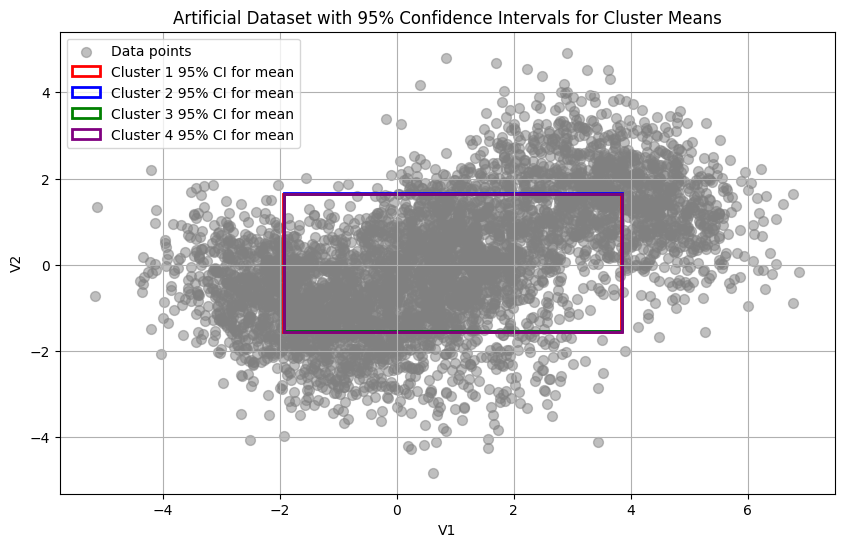

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Load the artificial dataset (replace with your actual path)
data2024b = pd.read_csv('data2024b.csv')  # Make sure this CSV file has columns V1 and V2
data2024b_values = data2024b[['V1', 'V2']].values

# 95% Confidence Intervals for Means (V1, V2)
means_conf_intervals = {
    1: {'lower': means_lower[0], 'upper': means_upper[0]},
    2: {'lower': means_lower[1], 'upper' :means_upper[1]},
    3: {'lower': means_lower[2], 'upper': means_upper[2]},
    4: {'lower': means_lower[3], 'upper': means_upper[3]}
}

# Cluster colors for plotting
cluster_colors = ['red', 'blue', 'green', 'purple']

# Plot the artificial dataset
plt.figure(figsize=(10, 6))
plt.scatter(data2024b_values[:, 0], data2024b_values[:, 1], c='gray', alpha=0.5, s=50, label='Data points')

# Overlay the confidence intervals for each cluster's mean
for cluster, conf_interval in means_conf_intervals.items():
    lower = conf_interval['lower']
    upper = conf_interval['upper']
    
    # Calculate the width and height of the rectangle (mean confidence interval box)
    width = upper[0] - lower[0]
    height = upper[1] - lower[1]
    
    # Plot the rectangle showing the confidence interval for the means
    rect = Rectangle(lower, width, height, edgecolor=cluster_colors[cluster - 1], 
                     facecolor='none', lw=2, label=f'Cluster {cluster} 95% CI for mean')
    
    plt.gca().add_patch(rect)

# Add labels and title
plt.title("Artificial Dataset with 95% Confidence Intervals for Cluster Means")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [22]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Load the artificial dataset
data2024b = pd.read_csv('data2024b.csv')
data2024b_values = data2024b[['V1', 'V2']].values

# Fit the initial GMM with 4 components
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
gmm.fit(data2024b_values)

# Number of bootstrap samples
n_bootstrap = 1000

# Arrays to store bootstrap parameters
bootstrap_means = np.zeros((n_bootstrap, gmm.means_.shape[0], gmm.means_.shape[1]))
bootstrap_covariances = np.zeros((n_bootstrap, gmm.covariances_.shape[0], gmm.covariances_.shape[1], gmm.covariances_.shape[2]))
bootstrap_weights = np.zeros((n_bootstrap, gmm.weights_.shape[0]))

# Helper function to sort the clusters by the first feature's mean (V1)
def sort_by_first_feature(means, covariances, weights):
    # Sort the clusters based on the first feature (V1) of the means
    sorted_indices = np.argsort(means[:, 0])
    return means[sorted_indices], covariances[sorted_indices], weights[sorted_indices]

# Bootstrapping procedure
for i in range(n_bootstrap):
    # Resample the data (with replacement)
    resampled_data = resample(data2024b_values, random_state=i)
    
    # Refit the GMM on the resampled data
    gmm_resampled = GaussianMixture(n_components=4, covariance_type='full', random_state=i)
    gmm_resampled.fit(resampled_data)
    
    # Sort the clusters to prevent label switching
    sorted_means, sorted_covariances, sorted_weights = sort_by_first_feature(
        gmm_resampled.means_, gmm_resampled.covariances_, gmm_resampled.weights_
    )
    
    # Store the parameters after sorting
    bootstrap_means[i] = sorted_means
    bootstrap_covariances[i] = sorted_covariances
    bootstrap_weights[i] = sorted_weights

# Compute 95% confidence intervals for means, covariances, and weights
means_lower = np.percentile(bootstrap_means, 2.5, axis=0)
means_upper = np.percentile(bootstrap_means, 97.5, axis=0)
covariances_lower = np.percentile(bootstrap_covariances, 2.5, axis=0)
covariances_upper = np.percentile(bootstrap_covariances, 97.5, axis=0)
weights_lower = np.percentile(bootstrap_weights, 2.5, axis=0)
weights_upper = np.percentile(bootstrap_weights, 97.5, axis=0)

# Print the confidence intervals for the means
print("95% Confidence Intervals for Means (per cluster):")
for i in range(4):  # Assuming 4 clusters
    print(f"Cluster {i+1} means (V1, V2): Lower = {means_lower[i]}, Upper = {means_upper[i]}")

# Print the confidence intervals for the covariances
print("\n95% Confidence Intervals for Covariances (per cluster):")
for i in range(4):  # Assuming 4 clusters
    print(f"Cluster {i+1} covariances (V1, V2):")
    print(f"Lower = \n{covariances_lower[i]}")
    print(f"Upper = \n{covariances_upper[i]}")

# Print the confidence intervals for the weights
print("\n95% Confidence Intervals for Weights (per cluster):")
for i in range(4):  # Assuming 4 clusters
    print(f"Cluster {i+1} weights: Lower = {weights_lower[i]:.4f}, Upper = {weights_upper[i]:.4f}")


95% Confidence Intervals for Means (per cluster):
Cluster 1 means (V1, V2): Lower = [-1.97515415 -0.88045389], Upper = [-1.77664504 -0.62085985]
Cluster 2 means (V1, V2): Lower = [-0.32275813 -1.60176787], Upper = [ 0.37044204 -1.14104034]
Cluster 3 means (V1, V2): Lower = [0.96897252 0.26100073], Upper = [1.19830703 0.56273388]
Cluster 4 means (V1, V2): Lower = [3.68749911 1.55603421], Upper = [3.88673323 1.67552216]

95% Confidence Intervals for Covariances (per cluster):
Cluster 1 covariances (V1, V2):
Lower = 
[[ 0.79440692 -0.35708626]
 [-0.35708626  0.73821472]]
Upper = 
[[ 0.97521611 -0.20776115]
 [-0.20776115  0.96438067]]
Cluster 2 covariances (V1, V2):
Lower = 
[[ 1.3397796  -0.22169729]
 [-0.22169729  0.8343873 ]]
Upper = 
[[1.861407   0.01583203]
 [0.01583203 1.1432501 ]]
Cluster 3 covariances (V1, V2):
Lower = 
[[ 0.76118673 -0.03413132]
 [-0.03413132  0.70262226]]
Upper = 
[[0.967138   0.13572417]
 [0.13572417 0.8718819 ]]
Cluster 4 covariances (V1, V2):
Lower = 
[[ 1.013

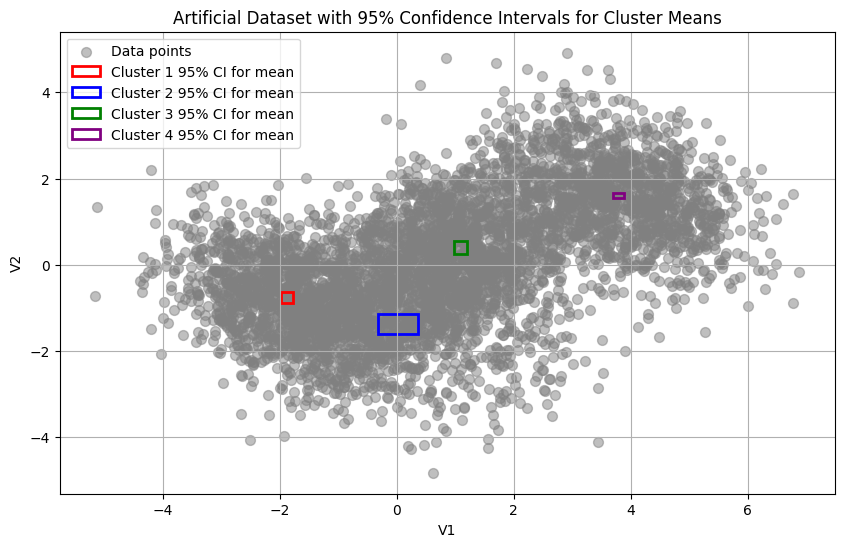

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Load the artificial dataset
data2024b = pd.read_csv('data2024b.csv')
data2024b_values = data2024b[['V1', 'V2']].values

# 95% Confidence Intervals for Means (V1, V2)
means_conf_intervals = {
    1: {'lower': means_lower[0], 'upper': means_upper[0]},
    2: {'lower': means_lower[1], 'upper' :means_upper[1]},
    3: {'lower': means_lower[2], 'upper': means_upper[2]},
    4: {'lower': means_lower[3], 'upper': means_upper[3]}
}

# Cluster colors for plotting
cluster_colors = ['red', 'blue', 'green', 'purple']

# Plot the artificial dataset
plt.figure(figsize=(10, 6))
plt.scatter(data2024b_values[:, 0], data2024b_values[:, 1], c='gray', alpha=0.5, s=50, label='Data points')

# Overlay the confidence intervals for each cluster's mean
for cluster, conf_interval in means_conf_intervals.items():
    lower = conf_interval['lower']
    upper = conf_interval['upper']
    
    # Calculate the width and height of the rectangle (mean confidence interval box)
    width = upper[0] - lower[0]
    height = upper[1] - lower[1]
    
    # Plot the rectangle showing the confidence interval for the means
    rect = Rectangle(lower, width, height, edgecolor=cluster_colors[cluster - 1], 
                     facecolor='none', lw=2, label=f'Cluster {cluster} 95% CI for mean')
    
    plt.gca().add_patch(rect)

# Add labels and title
plt.title("Artificial Dataset with 95% Confidence Intervals for Cluster Means")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
